# I. Theoretial Part

## 1. Boosting: Additive Model

1. Boosting is a way of fitting an additive expansion in a set of elementary “basis” functions:
$$f(x) = \sum_{m=1}^M\beta_m b(x;\gamma_m),$$
where $\beta_m\in\mathbb R$ and $b(\cdot;\gamma_m)$ are basis functions/models.

2. Typically these models are fit by minimizing a loss function averaged over the training data:
$$\min_{\{\beta_m,\gamma_m\}_1^M}\sum_{i=1}^n L\Big(y_i, \sum_{m=1}^M\beta_m b(x_i;\gamma_m)\Big).~~~~~(1)$$
*Example*: $L(y, f(x)) = (y − f(x))^2$.

## 2. Forward Stagewise Additive Modeling

1. For many loss functions/basis functions, solving (1) is computationally intensive.
A simple alternative is called <span style="color:DodgerBlue">**forward stagewise modeling**</span>, which <span style="color:Crimson">approximates</span> the solution by sequentially adding new basis functions to the expansion without adjusting the parameters and coefficients of those that have already been added.
<br><br>
<font size="3", color='Blue'>**Algorithm 1**</font>  *Forward Stagewise Additive Modeling (FSAM)*.
>1. Initialize $f_0(x) = 0$.
>2. For $m = 1$ to $M$:
>> 1. Compute $$(\beta_m, \gamma_m) = \arg\min_{\beta,\gamma}\sum_{i=1}^nL(y_i,f_{m-1}(x_i)+\beta b(x_i;\gamma))$$.
>> 2. Set $f_m(x) = f_{m−1}(x) + \beta_m b(x; \gamma_m)$.

2. For squared-error loss, we have
$$L(y_i, f_{m-1}(x_i)+\beta b(x_i;\gamma)) = (\underbrace{y_i-f_{m-1}(x_i)}_{residual}-\beta b(x_i;\gamma))^2,$$
where $y_i − f_{m−1}(x_i)$ is simply the residual of the current model on the $i$th observation. 
<br><br>
Thus, in regression, we find $\beta_m b(x; \gamma_m)$ that **best fits the current residuals**.

## 3. Exponential Loss and AdaBoost

1. For classification, we should consider other loss functions, such as logistic loss and exponential loss.<br>
We can show that the famous <font color='DodgerBlue'>**AdaBoost**</font> algorithm (not shown here) is equivalent to **FSAM (Algorithm 1**) using the <font color="LimeGreen">exponential loss function</font> $$L(y, f(x)) = exp(−y f(x)).$$
<br><br>
2. Using exponential loss, FSAM requires to solve
$$(\beta_m, \gamma_m) = \arg\min_{\beta,\gamma}\sum_{i=1}^n exp[−y_i(f_{m−1}(x_i) + \beta G(x_i))],$$
where $G(x_i)\in\{-1,1\}$ are individual classifiers. This can be expressed as
$$(\beta_m, \gamma_m) = \arg\min_{\beta,\gamma}\sum_{i=1}^n w_i^{(m)}exp(−\beta y_i G(x_i))~~~~~ (2)$$
with $w_i^{(m)} = exp(−y_i f_{m−1}(x_i))$.
<br><br>
It can be shown that the solution of (2) is
$$\begin{cases}G_m = \arg\min_G\sum_{i=1}^n w_i^{(m)}I(y_i\ne G(x_i)),\\\beta_m = \frac{1}{2}\log\frac{1-\text{err}_m}{\text{err}_m},\end{cases}$$
where $\text{err}_m = \frac{\sum_{i=1}^N w_i^{(m)}I(y_i\ne G_m(x_i))}{\sum_{i=1}^n w_i^{(m)}}$.
<br><br>
Therefore, $G_m$ should be a *weighted* classifier (with weights $w_i^{(m)}$).
<br><br>
3. Clearly, Adaboost is not optimizing **misclassification error**, but approximates it using the exponential loss, which is more sensitive to changes in the estimated class probabilities and results in a simple algorithm.
<br><br>
4. From statistical perspective, even though $e^{−Yf}$ is not a proper log-likelihood, it leads to the same solution as that of logistic loss at the **population level**.


## 4. Boosting Trees

1. As an example, boosted trees are widely used in applications. 
<br>
**Tree Review**: Trees partition the feature space into disjoint
regions $R_j, j = 1, 2,\cdots, J$ (the terminal nodes), and assign a **score** $\gamma_j$ to each **region** $R_j$. Then the predictive rule is
$$x\in R_j \Rightarrow f(x) = \gamma_j,$$
and the tree can be expressed as
$$ T(x;\Theta) = \sum_{j=1}^J\gamma_j \cdot I(x\in R_j)$$
with parameters $\Theta = \{R_j,\gamma_j\}_1^J$.
<br><br>
2. ** Tree Review**: The parameter estimation is equivalent to 
$$\hat{\Theta} = \arg\min_{\Theta} \sum_{j=1}^J \sum_{x_i\in R_j} L(y_i,\gamma_j).$$
Instead of solving the problem directly, people usually use a <font color='DodgerBlue'>greedy</font> algorithm to find a *<font color="Crimson">suboptimal</font>* tree. 
<br>
We could divide optimization problem into two parts:
> (a) Finding $R_j$.<br>
> (b) Finding $\gamma_j$ given $R_j$.
<br><br>
\* Part (b) is simple even for a general loss function (e.g., we use average response in regression and majority vote in classification).
<br>
\* For classification, it is sometimes necessary to **approximate misclassification error** by a more convenient one in part (a), such as Gini index and cross entropy.

3. The **<font color='DodgerBlue'>boosted tree model</font>** is a sum of trees,
$$f_M(x) = \sum_{m=1}^M T(x;\Theta_m).$$
\* The $\beta$ in (1) has been absorbed into $\gamma_j$ estimation.
<br><br>
In FSAM, we have to solve 
$$ \hat{\Theta}_m = \arg\min_{\Theta_m} \sum_{i=1}^n L(y_i, f_{m-1}(x_i)+T(x_i;\Theta_m)).~~~~~ (3)$$
> 1. For **squared-error loss**, it is simply the *<font color='LimeGreen'>regression tree</font>* that best predicts the current residuals $y_i − f_{m−1}(xi)$, and $\hat\gamma_j$ is the mean of these residuals in $R_j$.
> 2. For **two-class classification** and **exponential loss**, it is equivalent to *<font color='LimeGreen'>AdaBoost using classification trees</font>*.
> 3. For a general (differentiable) loss function, FSAM may not be simple. We refer to Gradient Boosting for fast approximate algorithms. 

## 5. Gradient Boosting
Gradient boosting borrows the idea of gradient descent to approximately solve (3) with any differentiable loss function.

1. Gradient descent revisited.
<br><br>
Let us go back to the loss function
$$L(f) = \sum_{i=1}^nL(y_i,f(x_i)).$$
Ignoring the constraint that $f$ is a summation, it can be viewed as
$$\hat{f} = \arg\min_f L(f),  ~~~~~ (4)$$
and <font color='DodgerBlue'>gradient descent update</font> is
$$\mathbf{f}_{m+1} = \mathbf{f}_m - \rho_m \mathbf{g}_m,$$
where $\mathbf{f}_m = [f_m(x_1),\cdots,f_m(x_n)]^\top$, $\rho_m$ is the step size and the components of the gradient $\mathbf g_m$ are 
$$g_{m,i} = \Bigg[\frac{\partial L(y_i,f(x_i))}{\partial f(x_i)}\Bigg]_{f(x_i) = f_m(x_i)}.$$
<br>
Therefore, the final solution has an additive form:
$$\mathbf{f}_M = \mathbf{f}_0 - \sum_{m=0}^{M-1} \rho_m \mathbf{g}_m,$$ 
where $\mathbf{f}_0$ is a random guess.
<br><br>
Indeed, the gradient descent would be the preferred strategy if minimizing the loss is our only goal. But it has **<font color="Crimson">no generalization ability</font>**, since the gradient is defined only at the training data.
<br><br>

2. Gradient Tree Boosting. ($\mathbf{GradientBoosting}$ in $\mathbf{Python}$)
<br><br>
To integrate the idea of gradient descent, one could induce a tree $T(x; \Theta_m)$ (or other model) at the $m$th iteration whose predictions are as close as possible to $-\mathbf g_m$. Using the following squared-error to measure closeness leads to a regression tree,
$$\tilde\Theta_m = \arg\min_\Theta \sum_{i=1}^n(-g_{m,i}-T(x_i;\Theta))^2.$$
Then 
$$\gamma_{m,j} = \arg\min_\gamma \sum_{x_i\in R_{m,j}}L(y_i,f_m(x_i)+\gamma).$$
Finally, update $$f_{m+1}(x) = f_m(x) + \sum_{j=1}^{J_m}\gamma_{m,j} I(x\in R_{m,j}). ~~~~~ (5)$$

3. Gradient Boosting = Gradient Descent + Boosting.
<br><br>
Intuition: 
> 1. In each stage, introduce a weak learner to compensate the shortcomings of existing weak learners.
> 2. In Adaboost, “shortcomings” are identified by high-weight data points.
> 3. In Gradient Boosting, “shortcomings” are identified by gradients.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A *general* gradient boosting algorithm is given as follows
![alt text](http://upload-images.jianshu.io/upload_images/1825085-22e64118df8aede5.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240 "Gradient Boosting Algorithm")

## 6. XGBoost (Newton Boosting)

1. Gradient boosting originates from gradient descent, then how about **Newton methods**? Since we treat $f(x_i)$ as unknown and so (4) is a one-dimensional optimization problem, Newton-type method is also feasible. 
<br><br>
Friedman et al. (2000) proposed modified algorithms using <font color='DodgerBlue'>Newton stepping</font> rather than exact optimization (or gradient descent) at each step. They solved a weighted regression problem to fit $-\frac{g_{m,i}}{h_{m,i}}$ with
$$h_{m,i} = \Bigg[\frac{\partial L^2(y_i,f(x_i))}{\partial^2 f(x_i)}\Bigg]_{f(x_i) = f_m(x_i)}.$$
<br>

2. Recently, <font color="Crimson">XGBoost</font> uses regression trees as the base model, and it will be much easier to integrate the Newton step (second-order approximation) into tree induction.
<br><br>
It considers the following variant of problem (3):
$$\min_{\Theta_m} \sum_{i=1}^n L(y_i, f_{m-1}(x_i)+T(x_i;\Theta_m)) + \eta|T_m|+\lambda\sum_{j=1}^{J_m}\gamma_j^2,~~~~~ (6)$$
where $|T_m|$ is the number of leaves of the tree $T(x;\Theta_m)$.
<br><br>
We take the *<font color='LimeGreen'>second-order Taylor expansion</font>* of $L(y_i,\cdot)$ at $f_{m-1}(x_i)$:
$$\begin{aligned}
&\sum_{i=1}^n L(y_i, f_{m-1}(x_i)+T(x_i;\Theta_m))\\
=\,&\sum_{i=1}^n \Big[L(y_i,f_{m-1}(x_i)) + g_{m,i}T(x_i;\Theta_m) + \frac{1}{2}h_{m,i}T^2(x_i;\Theta_m)\Big].
\end{aligned}$$
Therefore, (6) becomes
$$\min_{\Theta_m} \sum_{i=1}^n \Big[g_{m,i}T(x_i;\Theta_m) + \frac{1}{2}h_{m,i}T^2(x_i;\Theta_m)\Big] + \eta|T_m|+\lambda\sum_{j=1}^{J_m}\gamma_j^2.$$
It is easy to design a simple tree-growing algorithm according to the criterion above (omit detail). Actually, minimizing the loss part only is equivalent to fitting a regression tree to the Newton step $-g_{m,i}/h_{m,i}$ with weight $h_{m,i}$, this can be seen from
$$\begin{aligned}
&\arg\min_{\Theta_m} \sum_{i=1}^n \Big[g_{m,i}T(x_i;\Theta_m) + \frac{1}{2}h_{m,i}T^2(x_i;\Theta_m)\Big]\\
=\,&\arg\min_{\Theta_m} \sum_{i=1}^n h_{m,i}\Big[2\frac{g_{m,i}}{h_{m,i}}T(x_i;\Theta_m) + T^2(x_i;\Theta_m)\Big]\\
=\,&\arg\min_{\Theta_m} \sum_{i=1}^n h_{m,i}\Big[ T(x_i;\Theta_m) + \frac{g_{m,i}}{h_{m,i}}\Big]^2.
\end{aligned}$$
> Therefore, **gradient boosting is a special case of newton boosting** when all $h_{m,i}$ are set to be 1.

3. The main benefits of XGBoost
> 1. Involving second-order information may give **faster convergence** (the idea is not novel).
> 2. Explicitly add **regularizations** to the overall objective.
> 3. Accept sparse data and automatically deal with **missing values**.
> 4. **Parallel** the tree-growing algorithm.

## 7. Regularization
1. Shrinkage (learning rate)
<br>
The simplest shrinkage is to scale the contribution of each base learner by a factor $\nu\in(0,1)$, i.e., (5) becomes
$$f_{m+1}(x) = f_m(x) + \nu\sum_{j=1}^{J_m}\gamma_{m,j} I(x\in R_{m,j}).$$
> 1. The parameter $\nu$ can be regarded as controlling the **learning rate** of the boosting procedure.
> 2. Smaller values of $\nu$ lead to larger values of $M$.
2. Subsampling (stochastic gradient boosting)
<br>
At each iteration we sample a subset of the training observations (without replacement).
> 1. Not only reduce the computing time, but produce a more accurate model in many cases.


# II. Programming
Compared with random forest, boosting usually gives more accurate results, but it is always necessary to tune its many hyperparameters in order to achieve the best results. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from time import time
import itertools
import xgboost as xgb

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [4]:
data = pd.read_csv('cross_data.csv')

categorical_var = ['age_grp_4L', 'hh_agr_type', 'inc_grp_3L', 'lifestage', 'segment']
date_var = ['date', 'time_period', 'date_applied', 'week', 'week_applied', 'month',
            'year', 'MLK', 'Presidents', 'Memorial', 'Independence', 'Labor',
            'Colombus', 'Veterans', 'Thanksgiving', 'Christmas', 'NewYears']
key_var = ['rlb_location_key', 'cif_permanent_key']
others = ['offered', 'apply']

data = pd.get_dummies(data, columns=categorical_var, prefix_sep=['_' for col in categorical_var])
features = list(data.columns)
for f in date_var + key_var + others:
    features.remove(f)
    
y = data['apply']
X = data[features]
X.rename(columns={'segment_Lower Mas':'segment_Lower', 'segment_Mass Affl':'segment_Mass', 'segment_Upper Mas':'segment_Upper',
                  'age_grp_4L_a [18 - 25]':'age_grp_4L_a', 'age_grp_4L_b [26 - 45]':'age_grp_4L_b', 'age_grp_4L_c [46 - 65]':'age_grp_4L_c',
                  'age_grp_4L_d [66 - 100]':'age_grp_4L_d', 'inc_grp_3L_a [0 - 50k)':'inc_grp_3L_a', 'inc_grp_3L_b [50k - 125k)':'inc_grp_3L_b',
                  'inc_grp_3L_c [125k - inf)':'inc_grp_3L_c'}, inplace=True)

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, random_state=12)

/opt/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


## 1. Gradient Boosting Machine

### Trying default parameters
Currently, GradientBoostingClassifier does not support "class_weight" (but it has the parameter "sample_weight" in 'fit' method).
So we do not use a weighted version here.

In [37]:
start = time()
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_trn,y_trn)
pred = clf.predict_proba(X_tst)[:,1]
print("Model fitting took %.2f seconds." % (time() - start))
print('AUC:', round(roc_auc_score(y_tst, pred), 5))

Model fitting took 81.45 seconds.
AUC: 0.93176


The result above is already better than the **tuned** random forest model.

Confusion matrix, without normalization
[[28048  2262]
 [  411  1140]]


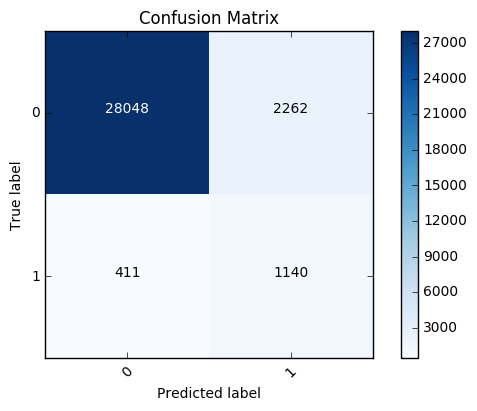

In [38]:
y_hat = [int(i>0.1) for i in pred]

cnf_matrix = confusion_matrix(y_tst, y_hat)
plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=False)

###  Storing GBM models
We can store the model we trained and reuse it later on another computer using Scikit-learn's joblib.

In [26]:
from sklearn.externals import joblib
joblib.dump(clf, 'clf_gbm.pkl')

['clf_gbm.pkl']

Load and reuse the model.

In [27]:
clf_clone = joblib.load('clf_gbm.pkl')
pred = clf_clone.predict_proba(X_tst)[:,1]

### Parameter tuning
The overall parameters can be mainly divided into 2 groups:
> **Tree parameters**: max_depth, max_features, min_samples_leaf, min_samples_split
<br>
> **Boosting parameters**: learning_rate, n_estimators, subsample

General Approach for Parameter Tuning:
1. Choose a relatively **high learning rate**. (Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems.)
2. Determine the **optimal number of trees** for this learning rate. (usually less than 100 for fast computation in tuning)
3. **Tune tree parameters** for the chosen learning rate and number of trees.
4. **Lower the learning rate** and increase the estimators proportionally to get more robust models (use early stopping for computational efficiency).

Tuning Tree Parameters. Since tuning gradient boosting trees is more time-consuming than forests, we could consider the following **hierarchical order**:
1. Tune max_depth and num_samples_split
2. Tune min_samples_leaf
3. Tune max_features

## 2. XGBoost
XGBoost features mostly the same parameters as GBM. ([official paramaeter documentation](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md))

The most important TREE parameters are:
1. *eta* (default=0.3): This is equivalent to the learning rate in Scikit-learn's GBM
2. *gamma* (default=0): This is $\eta$ in (6) (minimum loss reduction required to make a further partition)
3. *min_child_weight* (default=1): This amounts to "min_samples_split" (higher values prevent overfitting and tree complexity)
4. *max_depth* (default=6): This is the number of interactions in the trees
5. *subsample* (default=1): This is a fraction of samples of the training data that we take in each iteration
6. *colsample_bytree* (default=1): This is the fraction of features in each iteration (different from "max_features")

### Trying the "same" parameters as those in GBM

In [36]:
start = time()
clf_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0)
clf_xgb.fit(X_trn, y_trn)
pred_xgb = clf_xgb.predict_proba(X_tst)[:,1]
print("Model fitting took %.2f seconds." % (time() - start))
print('AUC:', round(roc_auc_score(y_tst, pred_xgb), 5))

Model fitting took 31.48 seconds.
AUC: 0.93312


We try a smaller learning rate to see the benefit of "slow learning".

In [3]:
param = {}
param['objective'] = 'binary:logistic'
param['eta'] = 0.01
param['eval_metric'] = 'auc'
param['max_depth'] = 3
param['subsample'] = 1
# param['base_score'] = np.mean(y_trn)
param['silent'] = True
# param['scale_pos_weight'] = (len(y_trn)-sum(y_trn))/sum(y_trn)

trn = xgb.DMatrix(X_trn, label=y_trn)
res = xgb.cv(param, trn, nfold=4, 
             stratified=True, num_boost_round=5000, early_stopping_rounds=50,
             verbose_eval=50, show_stdv=True, metrics={'auc'}, maximize=True)

[0]	train-auc:0.848174+0.00315765	test-auc:0.843925+0.00474122
[50]	train-auc:0.884486+0.00164698	test-auc:0.880825+0.00380552
[100]	train-auc:0.888492+0.000971851	test-auc:0.884818+0.00348538
[150]	train-auc:0.894214+0.00107696	test-auc:0.890599+0.0021118
[200]	train-auc:0.898933+0.00237678	test-auc:0.89509+0.00222868
[250]	train-auc:0.904731+0.00234877	test-auc:0.900809+0.00391754
[300]	train-auc:0.909281+0.00166747	test-auc:0.905263+0.00443173
[350]	train-auc:0.915283+0.00162927	test-auc:0.910199+0.00387473
[400]	train-auc:0.919511+0.00178039	test-auc:0.91437+0.00430544
[450]	train-auc:0.922125+0.00186138	test-auc:0.916875+0.00375272
[500]	train-auc:0.924936+0.00192321	test-auc:0.919694+0.00298745
[550]	train-auc:0.927237+0.00155813	test-auc:0.921831+0.00260135
[600]	train-auc:0.929508+0.00104173	test-auc:0.923976+0.00265031
[650]	train-auc:0.931477+0.000932936	test-auc:0.925762+0.00267628
[700]	train-auc:0.933262+0.000577879	test-auc:0.927213+0.00286627
[750]	train-auc:0.934978+0.0

In [4]:
min_index = np.argmax(res['test-auc-mean'])
tst = xgb.DMatrix(X_tst, label=y_tst)
model = xgb.train(param, trn, min_index, [(trn,'train'), (tst, 'test')], verbose_eval=50)

[0]	train-auc:0.851111	test-auc:0.851934
[50]	train-auc:0.887074	test-auc:0.886999
[100]	train-auc:0.888968	test-auc:0.887678
[150]	train-auc:0.893974	test-auc:0.892745
[200]	train-auc:0.898112	test-auc:0.896586
[250]	train-auc:0.90567	test-auc:0.902718
[300]	train-auc:0.909374	test-auc:0.905285
[350]	train-auc:0.91365	test-auc:0.909596
[400]	train-auc:0.918733	test-auc:0.914814
[450]	train-auc:0.92127	test-auc:0.917287
[500]	train-auc:0.92467	test-auc:0.920252
[550]	train-auc:0.926829	test-auc:0.921963
[600]	train-auc:0.928635	test-auc:0.923321
[650]	train-auc:0.93045	test-auc:0.924778
[700]	train-auc:0.931848	test-auc:0.925718
[750]	train-auc:0.933868	test-auc:0.927372
[800]	train-auc:0.935452	test-auc:0.928698
[850]	train-auc:0.936625	test-auc:0.929572
[900]	train-auc:0.937732	test-auc:0.930265
[950]	train-auc:0.938736	test-auc:0.930965
[1000]	train-auc:0.93962	test-auc:0.931504
[1050]	train-auc:0.940446	test-auc:0.931902
[1100]	train-auc:0.941212	test-auc:0.932255
[1150]	train-auc:

In [6]:
pred_xgb = model.predict(tst)
print('AUC:', round(roc_auc_score(y_tst, pred_xgb), 5))

AUC: 0.93698


## Parameter Tuning
The general approach for parameter tuning is same as that of GBM. We can also use a hierarchical order for TREE parameter tuning:
1. max_depth and min_child_weight
2. gamma
3. subsample and colsample_bytree

In [8]:
def xbg_tune(model, X_trn, y_trn, param_dict, scoring, n_iter=None, n_jobs=1):
    print('The base model is:\n', model.set_params())
    if n_iter == None:
        grid_search = GridSearchCV(model, param_grid=param_dict, scoring=scoring, n_jobs=n_jobs)
        start = time()
        grid_search.fit(X_trn, y_trn)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(grid_search.cv_results_['params'])))
    else:
        grid_search = RandomizedSearchCV(model, param_distributions=param_dict, scoring=scoring, n_iter=n_iter, n_jobs=-1)
        start = time()
        grid_search.fit(X_trn, y_trn)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings.")
    cv_score = pd.DataFrame({'cv_score':list(grid_search.cv_results_['mean_test_score'])})
    output = pd.concat([pd.DataFrame(list(grid_search.cv_results_['params'])), cv_score], axis=1)
    return grid_search, output[list(param_dict.keys()) + ['cv_score']]     

Choose a relatively **high learning rate**. Determine the **optimal number of trees** for this learning rate.

In [4]:
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
xgb_param = xgb_clf.get_xgb_params()
cvresult = xgb.cv(xgb_param, trn, num_boost_round=xgb_clf.get_params()['n_estimators'], nfold=5,
           metrics='auc', maximize=True, early_stopping_rounds=30, verbose_eval=None)
print('The best iteration number is', np.argmax(cvresult['test-auc-mean']))

**Tune tree parameters** for the chosen learning rate and number of trees.
<br><br>
(i) max_depth and min_child_weight

In [6]:
param_dict = {'max_depth':range(3,10,2),
              'min_child_weight':range(1,8,2)}
xgb_clf.set_params(n_estimators = 168)#np.argmax(cvresult['test-auc-mean']))
grid_search, output = xbg_tune(xgb_clf, X_trn, y_trn, param_dict, scoring='roc_auc', n_iter=None, n_jobs=1):
output

The base model is:
 XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=168, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)
GridSearchCV took 1344.21 seconds for 16 candidate parameter settings.


,min_child_weight,max_depth,cv_score
0,1,3,0.936527
1,3,3,0.935983
2,5,3,0.935181
3,7,3,0.935824
4,1,5,0.938636
5,3,5,0.939099
6,5,5,0.938481
7,7,5,0.938416
8,1,7,0.936592
9,3,7,0.938419


In [10]:
param_dict = {'max_depth':[4,5,6],
              'min_child_weight':[2,3,4]}
#xgb_clf.set_params(n_estimators=np.argmax(cvresult['test-auc-mean']))
grid_search, output = xbg_tune(xgb_clf, X_trn, y_trn, param_dict, scoring='roc_auc', n_iter=None, n_jobs=1)
output.sort_values('cv_score', ascending=False)

The base model is:
 XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=168, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)
GridSearchCV took 447.67 seconds for 9 candidate parameter settings.


,max_depth,min_child_weight,cv_score
7,6,3,0.939290
6,6,2,0.939107
3,5,2,0.939103
4,5,3,0.939099
5,5,4,0.938420
8,6,4,0.938334
0,4,2,0.938298
1,4,3,0.938106
2,4,4,0.937819


(ii) gamma

In [11]:
xgb_clf.set_params(max_depth=6, min_child_weight=3)
param_dict = {'gamma':[i/10.0 for i in range(0,5)]}
grid_search, output = xbg_tune(xgb_clf, X_trn, y_trn, param_dict, scoring='roc_auc', n_iter=None, n_jobs=1)
output.sort_values('cv_score', ascending=False)

The base model is:
 XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=168, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)
GridSearchCV took 309.62 seconds for 5 candidate parameter settings.


,gamma,cv_score
0,0.0,0.939290
2,0.2,0.939269
3,0.3,0.939017
4,0.4,0.939013
1,0.1,0.938711


(iii) subsample and colsample_bytree

In [12]:
xgb_clf.set_params(gamma=0)
param_dict = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid_search, output = xbg_tune(xgb_clf, X_trn, y_trn, param_dict, scoring='roc_auc', n_iter=None, n_jobs=1)
output.sort_values('cv_score', ascending=False)

The base model is:
 XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=168, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)
GridSearchCV took 874.09 seconds for 16 candidate parameter settings.


,colsample_bytree,subsample,cv_score
3,0.6,0.9,0.939378
14,0.9,0.8,0.939375
10,0.8,0.8,0.939290
6,0.7,0.8,0.939055
11,0.8,0.9,0.939039
7,0.7,0.9,0.938641
2,0.6,0.8,0.938540
9,0.8,0.7,0.937993
15,0.9,0.9,0.937983
13,0.9,0.7,0.937551


In [14]:
param_dict = {
 'subsample':[0.8,0.85,0.9],
 'colsample_bytree':[0.6,0.85,0.9]
}
grid_search, output = xbg_tune(xgb_clf, X_trn, y_trn, param_dict, scoring='roc_auc', n_iter=None, n_jobs=1)
output.sort_values('cv_score', ascending=False)

The base model is:
 XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=168, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)
GridSearchCV took 504.06 seconds for 9 candidate parameter settings.


,colsample_bytree,subsample,cv_score
1,0.60,0.85,0.939493
2,0.60,0.90,0.939378
6,0.90,0.80,0.939375
4,0.85,0.85,0.938960
3,0.85,0.80,0.938920
5,0.85,0.90,0.938712
0,0.60,0.80,0.938540
7,0.90,0.85,0.938288
8,0.90,0.90,0.937983


**Lower the learning rate** and increase the estimators proportionally to get a more robust model.

In [7]:
xgb_param = {}
xgb_param['learning_rate'] = 0.01
xgb_param['objective'] = 'binary:logistic'
xgb_param['eval_metric'] = 'auc'
xgb_param['max_depth'] = 6
xgb_param['min_child_weight'] = 3
xgb_param['subsample'] = 0.85
xgb_param['base_score'] = 0.5
xgb_param['colsample_bytree'] = 0.6
xgb_param['gamma'] = 0 

trn = xgb.DMatrix(X_trn, label=y_trn)
cvresult = xgb.cv(xgb_param, trn, num_boost_round=5000, nfold=5,
           metrics='auc', maximize=True, early_stopping_rounds=50, verbose_eval=50)
min_index = np.argmax(cvresult['test-auc-mean'])
print('The best iteration number is', min_index)

[0]	train-auc:0.8633+0.0020321	test-auc:0.848492+0.00466683
[50]	train-auc:0.932024+0.00186486	test-auc:0.921092+0.00335257
[100]	train-auc:0.935397+0.000903533	test-auc:0.923674+0.00405338
[150]	train-auc:0.93839+0.00107005	test-auc:0.925337+0.003836
[200]	train-auc:0.940804+0.00102313	test-auc:0.926403+0.00383785
[250]	train-auc:0.943291+0.000976147	test-auc:0.927711+0.00380154
[300]	train-auc:0.945762+0.00106057	test-auc:0.929163+0.00393155
[350]	train-auc:0.948236+0.00104086	test-auc:0.930735+0.00383482
[400]	train-auc:0.950775+0.00108259	test-auc:0.932365+0.00388188
[450]	train-auc:0.952855+0.000986764	test-auc:0.933748+0.00399645
[500]	train-auc:0.954801+0.000983759	test-auc:0.934903+0.00400277
[550]	train-auc:0.95658+0.000974923	test-auc:0.935855+0.00418135
[600]	train-auc:0.958293+0.00100266	test-auc:0.936758+0.00420054
[650]	train-auc:0.960212+0.000983625	test-auc:0.937396+0.00418085
[700]	train-auc:0.96222+0.000942779	test-auc:0.938087+0.00422735
[750]	train-auc:0.964179+0.00

In [8]:
tst = xgb.DMatrix(X_tst, label=y_tst)
xgb_param['eval_metric'] = 'auc'
model = xgb.train(xgb_param, trn, min_index, [(trn,'train'), (tst, 'test')], verbose_eval=50)

[0]	train-auc:0.873111	test-auc:0.869098
[50]	train-auc:0.931792	test-auc:0.920491
[100]	train-auc:0.934507	test-auc:0.922186
[150]	train-auc:0.936226	test-auc:0.922289
[200]	train-auc:0.938857	test-auc:0.92386
[250]	train-auc:0.941707	test-auc:0.924911
[300]	train-auc:0.943705	test-auc:0.92588
[350]	train-auc:0.945924	test-auc:0.927402
[400]	train-auc:0.948481	test-auc:0.929276
[450]	train-auc:0.95025	test-auc:0.930915
[500]	train-auc:0.952012	test-auc:0.932431
[550]	train-auc:0.953837	test-auc:0.933712
[600]	train-auc:0.955497	test-auc:0.934644
[650]	train-auc:0.957372	test-auc:0.935399
[700]	train-auc:0.959292	test-auc:0.936228
[750]	train-auc:0.961191	test-auc:0.936876
[800]	train-auc:0.962745	test-auc:0.937417
[850]	train-auc:0.964288	test-auc:0.937636
[900]	train-auc:0.96569	test-auc:0.937884
[950]	train-auc:0.966818	test-auc:0.938016
[1000]	train-auc:0.96803	test-auc:0.938132
[1050]	train-auc:0.969269	test-auc:0.938363
[1100]	train-auc:0.970344	test-auc:0.93849
[1150]	train-auc:

In [10]:
pred_xgb = model.predict(tst)
print('AUC:', round(roc_auc_score(y_tst, pred_xgb), 5))

AUC: 0.93864


Comment: It is **difficult to get a very big leap** in performance by just using parameter tuning or slightly better models. The test AUC increase from 0.93698 to 0.93864 due to parameter tuning. This is a decent improvement but not something very substantial.

## Plotting feature importance

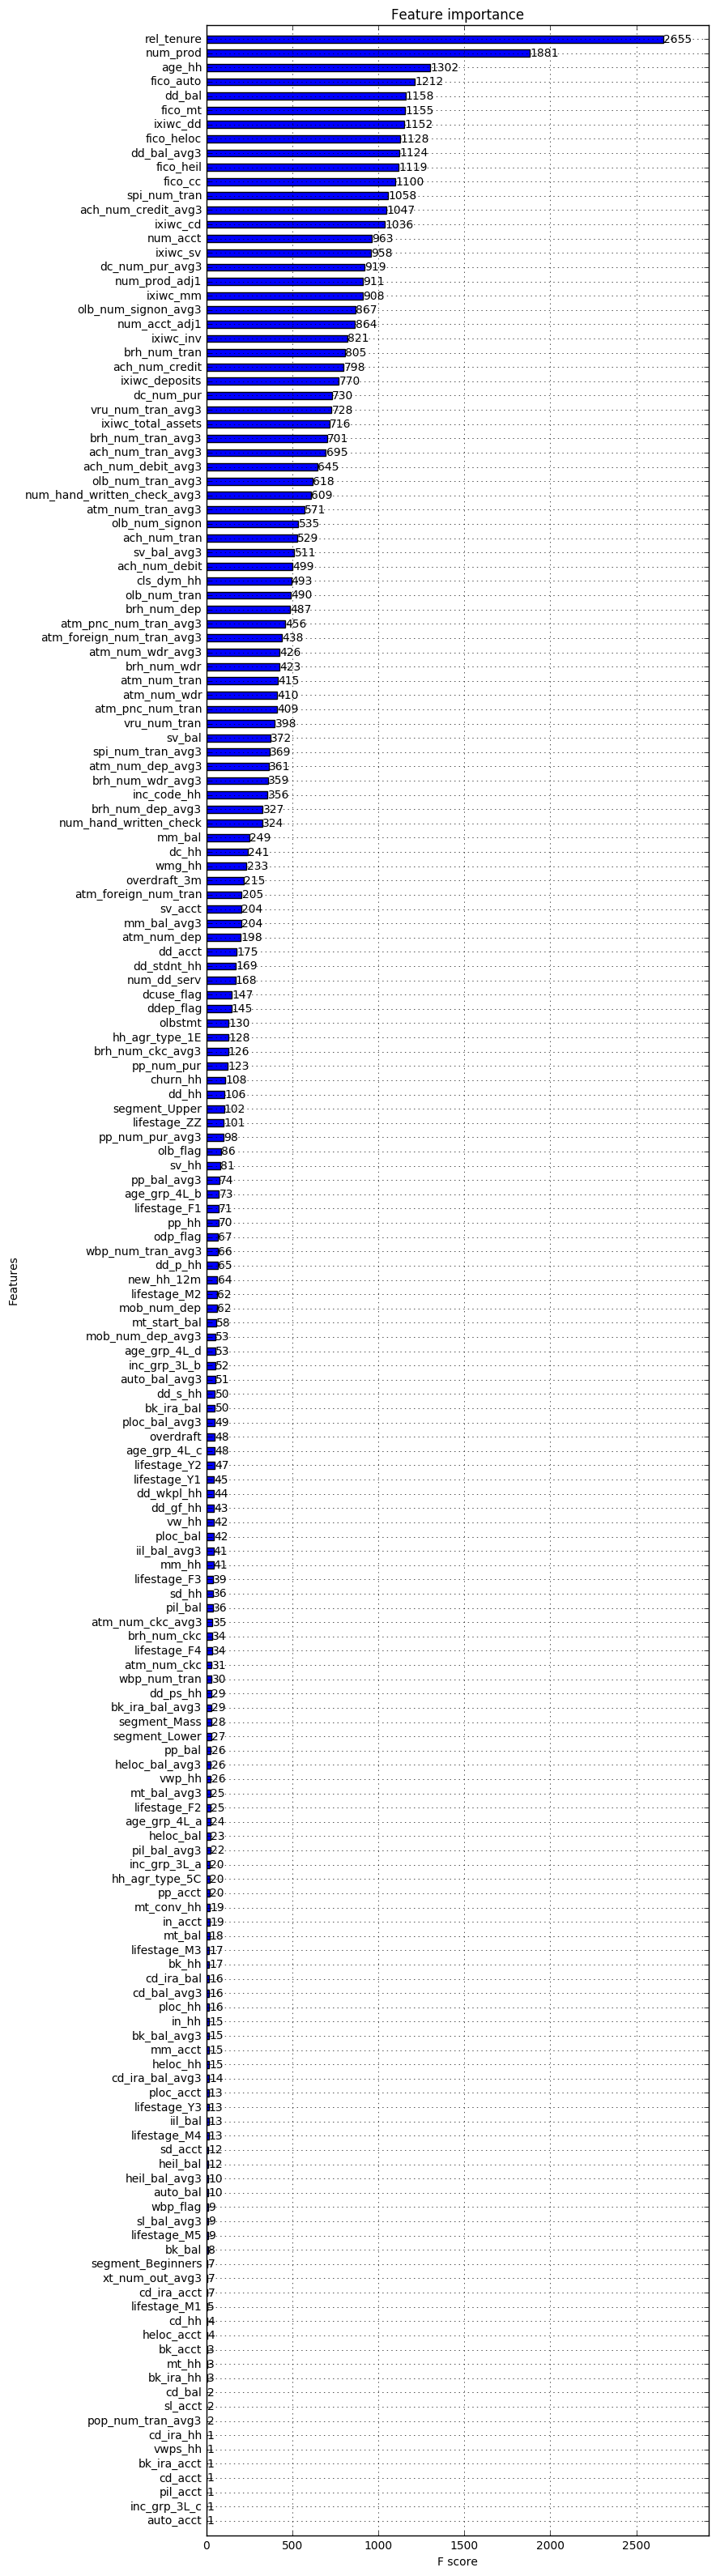

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,40))
xgb.plot_importance(model, height=0.5, ax=ax)

##  Saving xgboost model and its prediction

In [13]:
import pickle

In [14]:
np.save('cross_xgb_pred', pred_xgb)
# y_hat = np.load('cross_xgb_pred')

In [15]:
pickle.dump(model, open("cross_xgb_model.pickle.dat", "wb"))
# model = pickle.load(open("cross_xgb_model.pickle.dat", "rb"))